<a href="https://colab.research.google.com/github/Tecindes/Challenge_Alura_Data_Science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [116]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()
tienda2.head()
tienda3.head()
tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


#1. Análisis de facturación



In [118]:
# prompt: Agrega campo Tienda para poder unir los DataFrames
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'


In [119]:
# Unir los DataFrames
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

# Total facturado por tienda
totalFacturadoTiendas=tiendas.groupby('Tienda').sum('Precio').sort_values(by='Precio', ascending=False)
print(f'Total facturado por tienda (en millones de S/):\n{(totalFacturadoTiendas.Precio/1000000).map("S/ {:,.2f}".format)}')


Total facturado por tienda (en millones de S/):
Tienda
Tienda 1    S/ 1,150.88
Tienda 2    S/ 1,116.34
Tienda 3    S/ 1,098.02
Tienda 4    S/ 1,038.38
Name: Precio, dtype: object


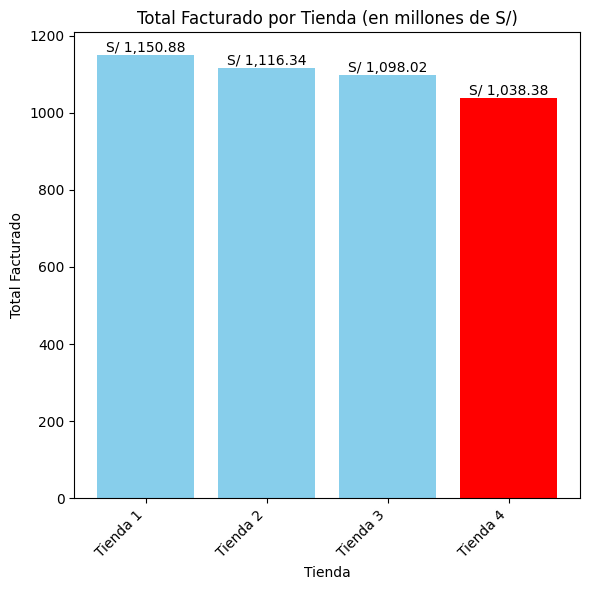

In [120]:
# prompt: crear un grafico tipo barra

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
colors = ['skyblue', 'skyblue', 'skyblue', 'red']
bars=plt.bar(totalFacturadoTiendas.index, (totalFacturadoTiendas['Precio'] / 1000000), color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"S/ {yval:,.2f}", va='bottom', ha='center')

plt.xlabel('Tienda')
plt.ylabel('Total Facturado')
plt.title('Total Facturado por Tienda (en millones de S/)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [121]:
# Cantidad de productos vendidos por categoría y tienda
totalCantidadProductosCategoria = tiendas.groupby(['Tienda', 'Categoría del Producto'])['Producto'].count().reset_index().sort_values(by=['Tienda','Producto'], ascending=False)
totalCantidadProductosCategoria = totalCantidadProductosCategoria.rename(columns={'Producto': 'Cantidad Vendida'})
primerosCategoriaTienda = totalCantidadProductosCategoria.groupby('Tienda').head(4).sort_values(by=['Tienda'], ascending=True)
primerosCategoriaTienda['Tienda Categoría'] = primerosCategoriaTienda['Tienda']+ ' - ' +primerosCategoriaTienda['Categoría del Producto']
primerosCategoriaTienda['Tienda Categoría'] = primerosCategoriaTienda['Tienda Categoría'].str.replace('Tienda ', '')
primerosCategoriaTienda


,Tienda,Categoría del Producto,Cantidad Vendida,Tienda Categoría
7,Tienda 1,Muebles,465,1 - Muebles
3,Tienda 1,Electrónicos,448,1 - Electrónicos
5,Tienda 1,Juguetes,324,1 - Juguetes
2,Tienda 1,Electrodomésticos,312,1 - Electrodomésticos
15,Tienda 2,Muebles,442,2 - Muebles
11,Tienda 2,Electrónicos,422,2 - Electrónicos
13,Tienda 2,Juguetes,313,2 - Juguetes
10,Tienda 2,Electrodomésticos,305,2 - Electrodomésticos
23,Tienda 3,Muebles,499,3 - Muebles
19,Tienda 3,Electrónicos,451,3 - Electrónicos


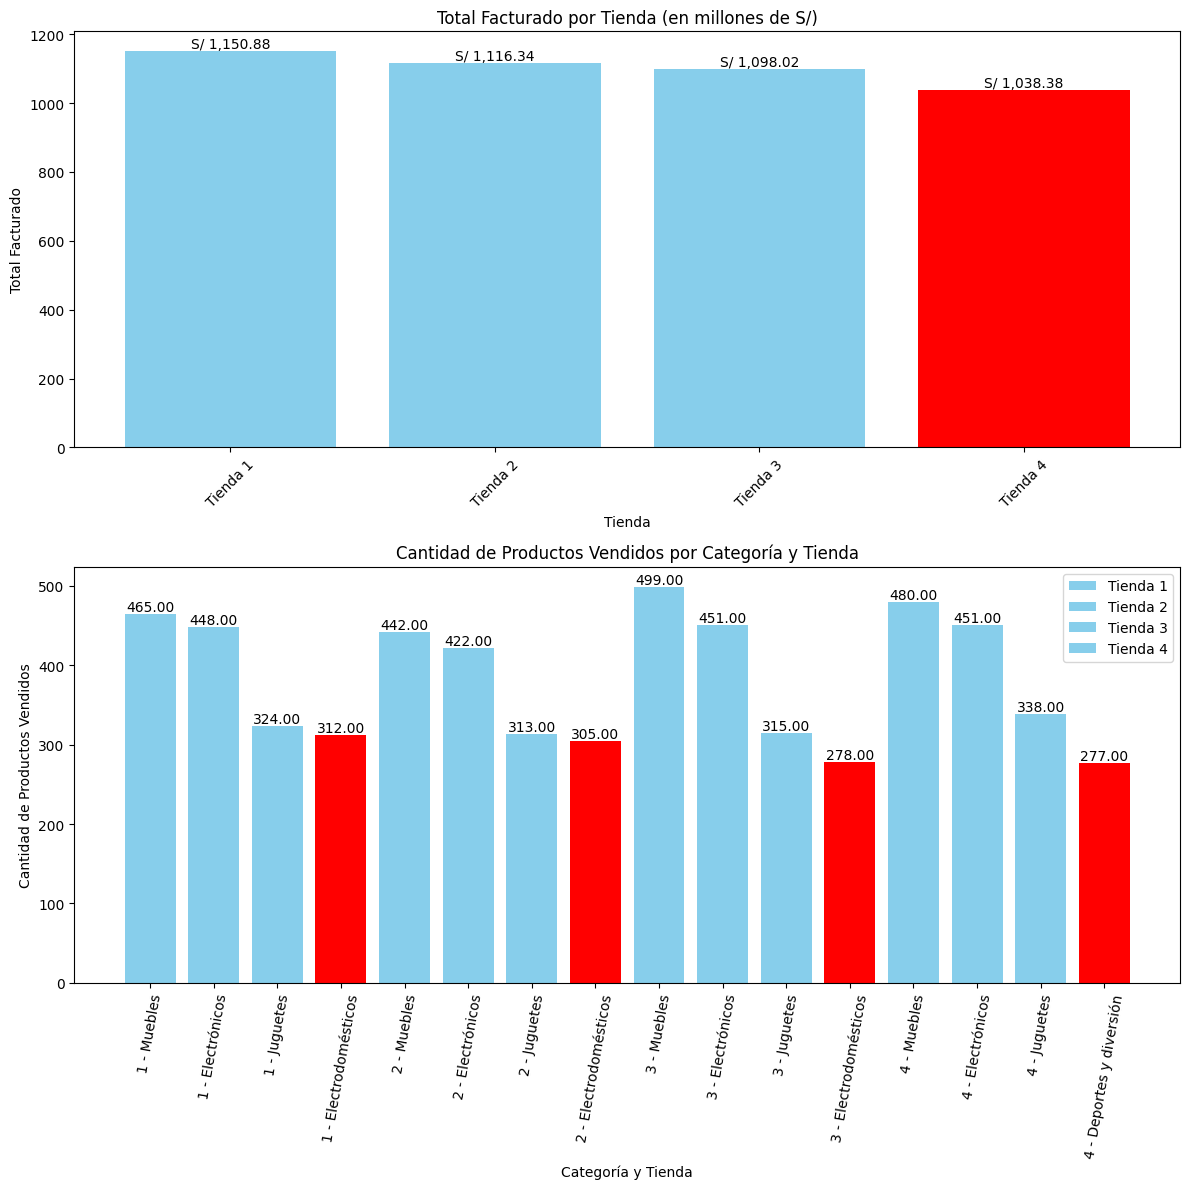

In [123]:
# prompt: crear  subplots en grafico de barras con pandas

import pandas as pd
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot 1: Total facturado por tienda
colors = ['skyblue', 'skyblue', 'skyblue', 'red']
bars = axes[0].bar(totalFacturadoTiendas.index, (totalFacturadoTiendas['Precio'] / 1000000), color=colors)

for bar in bars:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, f"S/ {yval:,.2f}", va='bottom', ha='center')

axes[0].set_xlabel('Tienda')
axes[0].set_ylabel('Total Facturado')
axes[0].set_title('Total Facturado por Tienda (en millones de S/)')
axes[0].tick_params(axis='x', rotation=45, labelsize=10)

# Plot 2: Cantidad de productos vendidos por categoría y tienda
for tienda in primerosCategoriaTienda['Tienda'].unique():
    tienda_data = primerosCategoriaTienda[primerosCategoriaTienda['Tienda'] == tienda]
    bars1 = axes[1].bar(tienda_data['Tienda Categoría'], tienda_data['Cantidad Vendida'], color=colors, label=tienda)
    for bar in bars1:
      yval = bar.get_height()
      axes[1].text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.2f}", va='bottom', ha='center')

axes[1].set_xlabel('Categoría y Tienda')
axes[1].set_ylabel('Cantidad de Productos Vendidos')
axes[1].set_title('Cantidad de Productos Vendidos por Categoría y Tienda')
axes[1].tick_params(axis='x', rotation=80)
axes[1].legend()

plt.tight_layout()
plt.show()


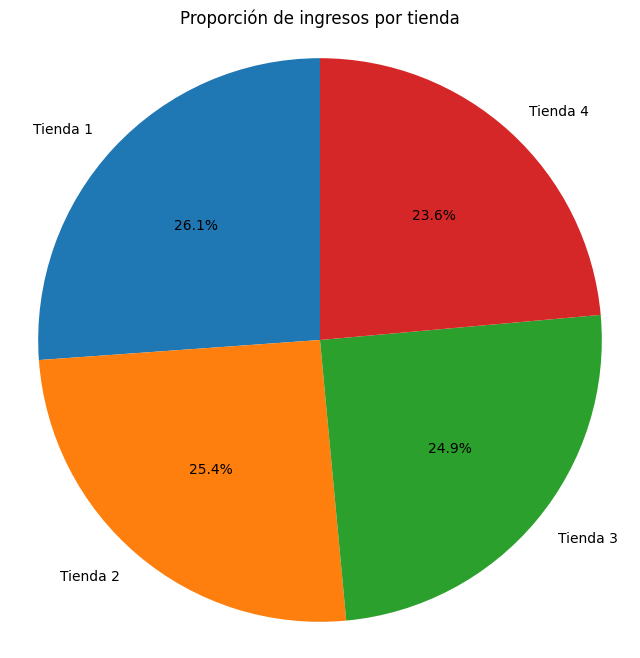

In [113]:
# prompt: genera in grafico circular con el dataframe primerosCategoriaTienda

# Assuming 'primerosCategoriaTienda' DataFrame is already created as in your provided code.

import matplotlib.pyplot as plt

# Create the pie chart
plt.figure(figsize=(8, 8))

# Group data for the pie chart
pie_data = totalFacturadoTiendas.groupby('Tienda')['Precio'].sum()
# Create the pie chart
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de ingresos por tienda')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


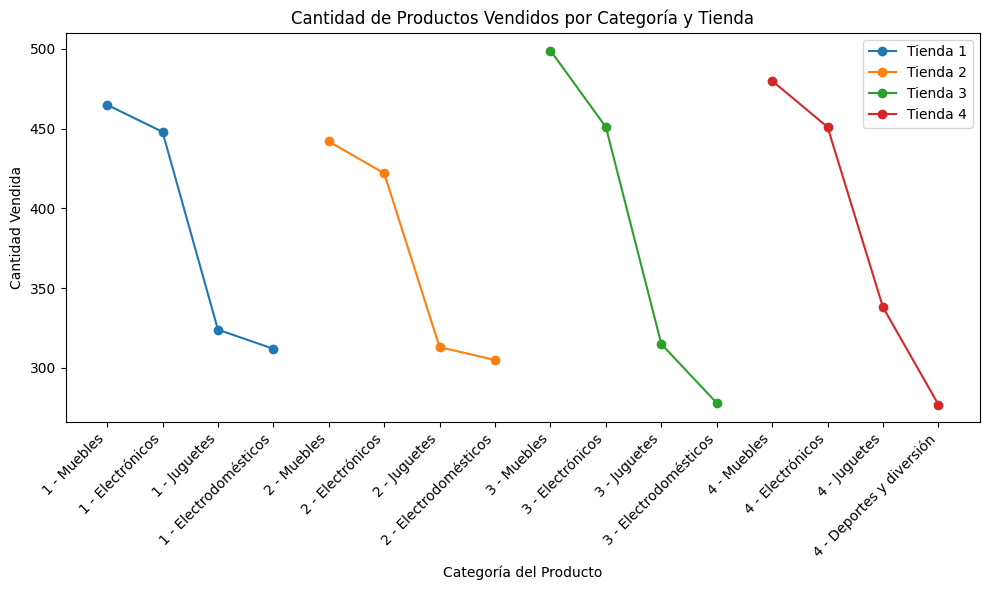

In [125]:
# prompt: con el dataframe primerosCategoriaTienda genera un grafico de lineas

import matplotlib.pyplot as plt

# Assuming 'primerosCategoriaTienda' DataFrame is already created as in your provided code.

plt.figure(figsize=(10, 6))

for tienda in primerosCategoriaTienda['Tienda'].unique():
    tienda_data = primerosCategoriaTienda[primerosCategoriaTienda['Tienda'] == tienda]
    plt.plot(tienda_data['Tienda Categoría'], tienda_data['Cantidad Vendida'], marker='o', label=tienda)

plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad Vendida')
plt.title('Cantidad de Productos Vendidos por Categoría y Tienda')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [9]:
# Cantidad de productos vendidos por categoría y tienda
calificacionPromedioClientesTienda = tiendas.groupby(['Tienda'])['Calificación'].mean().reset_index().sort_values(by=['Tienda'], ascending=True)
calificacionPromedioClientesTienda = calificacionPromedioClientesTienda.rename(columns={'Calificación': 'Valoración Media'})
calificacionPromedioClientesTienda = calificacionPromedioClientesTienda.sort_values(by=['Valoración Media'], ascending=False)
calificacionPromedioClientesTienda



,Tienda,Valoración Media
2,Tienda 3,4.048326
1,Tienda 2,4.037304
3,Tienda 4,3.995759
0,Tienda 1,3.976685


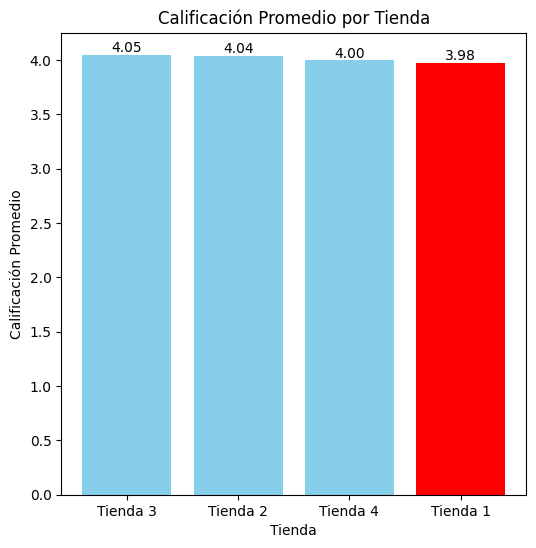

In [10]:
# prompt: crear grafico de barras con pandas
plt.figure(figsize=(6, 6))
colors = ['skyblue', 'skyblue', 'skyblue', 'red']
bars=plt.bar(calificacionPromedioClientesTienda['Tienda'], (calificacionPromedioClientesTienda['Valoración Media']), color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.2f}", va='bottom', ha='center')

plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda')
plt.show()




# 4. Productos más y menos vendidos

In [74]:
# prompt: agrupa los datos por tienda y calcula la cantidad de productos vendidos
productosVendidosTienda = tiendas.groupby(['Tienda', 'Producto'])['Precio'].count().reset_index()
productosVendidosTienda =productosVendidosTienda.rename(columns={'Precio': 'Cantidad Vendida'})
productosVendidosTienda['Tienda Producto'] = productosVendidosTienda['Tienda']+ ' - ' +productosVendidosTienda['Producto']


# agrupa por tienda y los más y menos vendidos
productosVendidosTienda=productosVendidosTienda.sort_values(by=['Tienda','Cantidad Vendida'], ascending=[True,False])
productosMasVendidosTienda=productosVendidosTienda.groupby('Tienda').head(2)

productosVendidosTienda=productosVendidosTienda.sort_values(by=['Tienda','Cantidad Vendida'], ascending=[True,True])
productosMenosVendidosTienda=productosVendidosTienda.groupby('Tienda').head(2)

print(productosMasVendidosTienda)
print(productosMenosVendidosTienda)



       Tienda                   Producto  Cantidad Vendida  \
1    Tienda 1                    Armario                60   
33   Tienda 1                 Microondas                60   
75   Tienda 2  Iniciando en programación                65   
84   Tienda 2                 Microondas                62   
129  Tienda 3              Kit de bancas                57   
113  Tienda 3                  Cama king                56   
163  Tienda 4                   Cama box                62   
168  Tienda 4                 Cubertería                59   

                          Tienda Producto  
1                      Tienda 1 - Armario  
33                  Tienda 1 - Microondas  
75   Tienda 2 - Iniciando en programación  
84                  Tienda 2 - Microondas  
129              Tienda 3 - Kit de bancas  
113                  Tienda 3 - Cama king  
163                   Tienda 4 - Cama box  
168                 Tienda 4 - Cubertería  
       Tienda                   Producto  Can

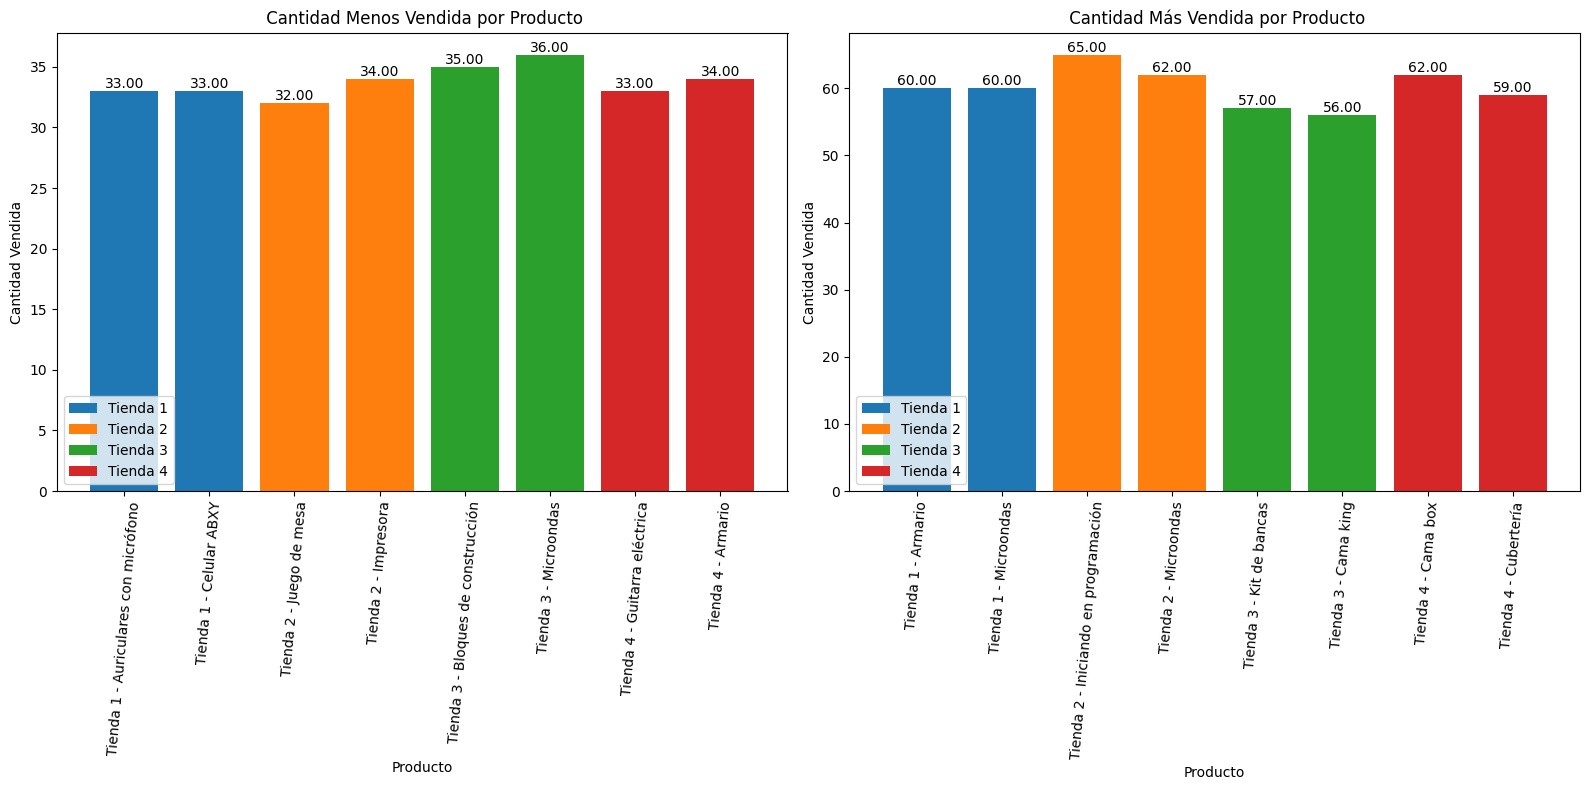

In [93]:
# prompt: crear grafico de barras
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
#plt.figure(figsize=(8, 8))
colors = ['skyblue', 'skyblue', 'skyblue', 'red']

for tienda in productosMenosVendidosTienda['Tienda'].unique():
    tienda_data = productosMenosVendidosTienda[productosMenosVendidosTienda['Tienda'] == tienda]
    bars = axes[0].bar(tienda_data['Tienda Producto'], tienda_data['Cantidad Vendida'], label=tienda)
    for bar in bars:
      yval = bar.get_height()
      axes[0].text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.2f}", va='bottom', ha='center')
axes[0].set_xlabel('Producto')
axes[0].set_ylabel('Cantidad Vendida')
axes[0].set_title(' Cantidad Menos Vendida por Producto')
axes[0].tick_params(axis='x', rotation=85)
axes[0].legend()._legend_box.align = "center"

for tienda in productosMasVendidosTienda['Tienda'].unique():
    tienda_data = productosMasVendidosTienda[productosMasVendidosTienda['Tienda'] == tienda]
    bars1 = axes[1].bar(tienda_data['Tienda Producto'], tienda_data['Cantidad Vendida'], label=tienda)
    for bar in bars1:
      yval = bar.get_height()
      axes[1].text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.2f}", va='bottom', ha='center')

axes[1].set_xlabel('Producto')
axes[1].set_ylabel('Cantidad Vendida')
axes[1].set_title(' Cantidad Más Vendida por Producto')
axes[1].tick_params(axis='x', rotation=85)
axes[1].legend()._legend_box.align = "center"
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [96]:
# Costo promedio de envío de productos vendidos por tienda
costoPromedioEnvioTienda = tiendas.groupby(['Tienda'])['Costo de envío'].mean().reset_index().sort_values(by=['Tienda'], ascending=True)
costoPromedioEnvioTienda = costoPromedioEnvioTienda.rename(columns={'Costo de envío': 'Envío Promedio'})
costoPromedioEnvioTienda = costoPromedioEnvioTienda.sort_values(by=['Envío Promedio'], ascending=False)
costoPromedioEnvioTienda


,Tienda,Envío Promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


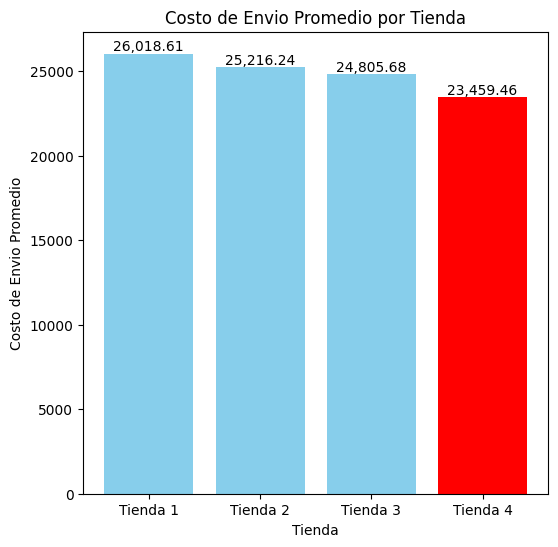

In [97]:
# prompt: crear grafico de barras con pandas
plt.figure(figsize=(6, 6))
colors = ['skyblue', 'skyblue', 'skyblue', 'red']
bars=plt.bar(costoPromedioEnvioTienda['Tienda'], (costoPromedioEnvioTienda['Envío Promedio']), color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.2f}", va='bottom', ha='center')

plt.xlabel('Tienda')
plt.ylabel('Costo de Envio Promedio')
plt.title('Costo de Envio Promedio por Tienda')
plt.show()